In [33]:
library(caret)
df_original <- read.csv('../cleaned_data/cleaning_data-02.csv')
#df <- replace(df, is.na(df), 99999)
#df <- df[, c(-1,-2,-3,-4,-9)]
#df <- as.data.frame(lapply(df, as.factor))
#print(head(df))

# Model 1

Independent Variable D1A_1V1L: Internal: Primary purpose of trip: work/earn money - Last, Head

Dependent Variable A12: Household: Can you write a letter? A13: Household: Level of education (Highest level passed) A14: Household: Livelihood/occupation D1A_6AL: Internal: District of destination - Last, Head D1A_7ML: Internal: Month of arrival - Last, Head A15V1: Household: Have migration experience?: Internal -- not in cleaned data? A15V2: Household: Have migration experience?: India -- not in cleaned data? A15V3: Household: Have migration experience?: Other country A15V4: Household: Have migration experience?: No migration

In [34]:
#df1 <-df_original[, c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4")]
# temporarily taking out D1A_6AL

#converting cateogorical variables to factor
#df1 <- as.data.frame(lapply(df1, factor))
#print(head(df1))

#df1 <-df_original[, c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4")]
df1 <-df_original[, c("D1A_1V1L", "A08", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
df1$Age <- 2019 - df1$A08
df1 <-df1[, c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
# temporarily taking out D1A_6AL

#converting cateogorical variables to factor
columns_to_factor <- c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4")
df1[columns_to_factor] <- lapply(df1[columns_to_factor], factor)

#df1 <- as.data.frame(lapply(df1, factor))
print(head(df1))

  D1A_1V1L  A12  A13  A14 D1A_7ML A15V1 A15V4 D1A_4 A11Y N1_6TAKA N1_12 N1_13
1     <NA>    1    4   14    <NA>  <NA>     4    NA   NA       NA    NA    NA
2     <NA> <NA>    2 <NA>    <NA>  <NA>     4    NA   NA       NA    NA    NA
3     <NA> <NA> <NA> <NA>    <NA>  <NA>     4    NA   NA       NA    NA    NA
4     <NA>    2    2   17    <NA>  <NA>     4    NA   13       NA    NA    NA
5     <NA>    1    4   10    <NA>  <NA>  <NA>    NA   19       NA    NA    NA
6     <NA>    2    4   17    <NA>     1  <NA>    NA   18       NA    NA    NA
  N1_14 N1_16 N1_17 D1A_10AF_3M D1A_10AL_3M D1A_8F
1    NA    NA    NA          NA          NA     NA
2    NA    NA    NA          NA          NA     NA
3    NA    NA    NA          NA          NA     NA
4    NA    NA    NA          NA          NA     NA
5    NA    NA    NA          NA          NA     NA
6    NA    NA    NA          NA          NA     NA


In [35]:
# converting variables to dummy variables
library("fastDummies")
df1 <- fastDummies::dummy_cols(df1)
print(dim(df1))

[1] 23506    73


In [36]:
# removing rows that do not have D1A_1V1L
df1 <- df1[!is.na(df1$D1A_1V1L), ]
# Dropped duplicate columns that we made into dummy variables already
df1 <- df1[, -which(names(df1) %in% c("D1A_1V1L_1", "D1A_1V1L_0", "D1A_1V1L_NA", "A12_2", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4"))]
#replace NA with 0, 0 meaning "No", assuming that if the participant did not say yes to a question, than it would be no.
df1 <- replace(df1, is.na(df1), 0)
print(head(df1))

   D1A_1V1L D1A_4 A11Y N1_6TAKA N1_12 N1_13 N1_14 N1_16 N1_17 D1A_10AF_3M
11        0     1   29    13000     0 12000     0  1000     0       18000
33        0     1   21    39800     0  3000     0   300     0       20000
38        1     4   23     1000  7000 10000 10000  2000 30000           0
43        1     1   21     6000  1500  2000  2000   500     0        6000
50        0     1   16        0     0     0     0     0     0           0
56        1     1   26     6000  1000  2000  2000  1000  4000        6000
   D1A_10AL_3M D1A_8F A12_1 A12_NA A13_1 A13_2 A13_3 A13_4 A13_5 A13_6 A13_7
11       18000    997     0      0     0     1     0     0     0     0     0
33       20000    997     0      0     1     0     0     0     0     0     0
38           0    156     0      0     0     1     0     0     0     0     0
43        6000     60     0      0     0     1     0     0     0     0     0
50           0     84     0      0     1     0     0     0     0     0     0
56        6000     1

In [37]:
# INSERT CODE 

set.seed(123) # for reproducibility
train_idx <- createDataPartition(df1$D1A_1V1L, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 

In [38]:
#trying a logistic regression
model <- glm(D1A_1V1L ~ ., data = df1, family = binomial)

# look at summary of logistic regression model
(summary2_lm <- summary(model))

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = D1A_1V1L ~ ., family = binomial, data = df1)

Coefficients: (8 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.061e+14  8.333e+13  -2.473  0.01339 *  
D1A_4        1.833e-01  7.051e-02   2.599  0.00935 ** 
A11Y        -1.066e-02  1.497e-02  -0.712  0.47651    
N1_6TAKA     3.752e-06  2.530e-06   1.483  0.13816    
N1_12        1.662e-04  6.695e-05   2.483  0.01304 *  
N1_13       -8.238e-06  2.960e-05  -0.278  0.78078    
N1_14        2.931e-04  4.555e-05   6.435 1.23e-10 ***
N1_16        6.135e-05  3.530e-05   1.738  0.08215 .  
N1_17        1.366e-06  3.071e-06   0.445  0.65645    
D1A_10AF_3M -6.188e-05  3.078e-05  -2.010  0.04439 *  
D1A_10AL_3M  1.428e-04  3.131e-05   4.561 5.10e-06 ***
D1A_8F      -1.395e-03  2.626e-04  -5.312 1.08e-07 ***
A12_1       -5.009e-01  3.555e-01  -1.409  0.15888    
A12_NA              NA         NA      NA       NA    
A13_1       -9.255e+13  8.429e+13  -1.098  0.27220   

In [39]:
# Create model with predictors found from linear model
model2 <- glm(D1A_1V1L ~ A14_8 + A14_9 + A14_17 + D1A_7ML_9, data = train, family = binomial)

# Make predictions on test data
predictions <- predict(model2, newdata = test, type = "response")

# Convert probabilities to class labels, assign greater than 0.5 to Positive
pred_classes <- ifelse(predictions > 0.5, "Positive", "Negative")

# Create the confusion matrix
cm <- table(Actual = test$D1A_1V1L, Predicted = pred_classes)

# Confusion Matrix
print(cm)

      Predicted
Actual Negative Positive
     0       20       43
     1        3      333


In [40]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP <- 333
TN <- 20
FP <- 43
FN <- 3

# Calculate accuracy
accuracy <- (TP + TN) / sum(cm)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (also called sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
F1 <- 2 * (precision * recall) / (precision + recall)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", F1, "\n")

Accuracy: 0.8847118 
Precision: 0.8856383 
Recall: 0.9910714 
F1 Score: 0.9353933 


## Regsubset - Attempt

In [41]:
# INSERT CODE 
library(leaps)

model1 <- regsubsets(D1A_1V1L ~ A14_8 + A14_9 + A14_17 + D1A_7ML_9, data = df1, nvmax = 71, method = "exhaustive")

summary(model1)

results1 <- summary(model1)

results1$adjr2
results1$cp
results1$bic


data.frame(
  Adj.R2 = which.max(results1$adjr2),
  CP = which.min(results1$cp),
  BIC = which.min(results1$bic)
)

Subset selection object
Call: regsubsets.formula(D1A_1V1L ~ A14_8 + A14_9 + A14_17 + D1A_7ML_9, 
    data = df1, nvmax = 71, method = "exhaustive")
4 Variables  (and intercept)
          Forced in Forced out
A14_8         FALSE      FALSE
A14_9         FALSE      FALSE
A14_17        FALSE      FALSE
D1A_7ML_9     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: exhaustive
         A14_8 A14_9 A14_17 D1A_7ML_9
1  ( 1 ) " "   " "   "*"    " "      
2  ( 1 ) " "   "*"   "*"    " "      
3  ( 1 ) "*"   "*"   "*"    " "      
4  ( 1 ) "*"   "*"   "*"    "*"      

[1] 0.2254049 0.2301918 0.2338925 0.2345368

[1] 25.835775 14.335536  5.679999  5.000000

[1] -496.6287 -502.4271 -505.4657 -500.5497

Adj.R2,CP,BIC
<int>,<int>,<int>
4,4,3


## Feature Selection/Interesting Findings

Results: A14_8 -1.747e+00 8.781e-01 -1.989 0.0467 \*\
A14_9 2.309e+00 9.075e-01 2.544 0.0110 \* A14_17 -2.934e+00 6.180e-01 -4.747 2.06e-06 \*\* *D1A_7ML_9 1.268e+00 6.034e-01 2.101 0.0356*

Descriptions Mapped: A14_8: Domestic servant A14_9: Non agricultural worker(factory worker, blue collar service) A14_17: Homemaker D1A_7ML_9: D1A_7ML: Internal: Month of arrival - Last, Head - Month 9/September \*\*\* could we also do year??

Conclusion: These predictors may have a relationship to D1A_1V1L: Internal: Primary purpose of trip: work/earn money - Last, Head.

# Model 2

Independent Variable D1A_1V1L: Internal: Primary purpose of trip: work/earn money - Last, Head

Dependent Variable. -- numeric D1A_4: Internal: Total number of trips - Head.\
-- numeric A08: Household: Year of birth converted to Age.\
-- numeric N1_6TAKA: Internal: How much paid in taka?\
-- numeric A11Y: Household: Age at first marriage.

N1_6TAKA. N1_12. N1_13. N1_14: Internal: Average monthly remittances sent home\
N1_16: Internal: Average monthly savings. N1_17\
G1_5A1SIL1\
G2_5B1S1 D1A_10AF_3M: Internal: Wage(taka)- First, Head Monthly\
D1A_10AL_3M. D1A_8F: Internal: Duration of stay - First, Head.

In [42]:
df2 <-df_original[, c("D1A_1V1L", "D1A_4", "A08", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
print(head(df2))

  D1A_1V1L D1A_4  A08 A11Y N1_6TAKA N1_12 N1_13 N1_14 N1_16 N1_17 D1A_10AF_3M
1       NA    NA 2004   NA       NA    NA    NA    NA    NA    NA          NA
2       NA    NA 2012   NA       NA    NA    NA    NA    NA    NA          NA
3       NA    NA 2016   NA       NA    NA    NA    NA    NA    NA          NA
4       NA    NA 1985   13       NA    NA    NA    NA    NA    NA          NA
5       NA    NA 1979   19       NA    NA    NA    NA    NA    NA          NA
6       NA    NA 1998   18       NA    NA    NA    NA    NA    NA          NA
  D1A_10AL_3M D1A_8F
1          NA     NA
2          NA     NA
3          NA     NA
4          NA     NA
5          NA     NA
6          NA     NA


In [43]:
df2 <- df2[!is.na(df2$D1A_1V1L), ]
df2 <- na.omit(df2)
df2$Age <- 2019 - df2$A08
df2 <-df2[, c("D1A_1V1L", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
print(head(df2))
print(dim(df2))

    D1A_1V1L D1A_4 A11Y N1_6TAKA N1_12 N1_13 N1_14 N1_16 N1_17 D1A_10AF_3M
11         0     1   29    13000     0 12000     0  1000     0       18000
33         0     1   21    39800     0  3000     0   300     0       20000
43         1     1   21     6000  1500  2000  2000   500     0        6000
56         1     1   26     6000  1000  2000  2000  1000  4000        6000
65         1     3   24    30000  1000  7000 12000  7000 30000       20000
136        1     2   25     1500     0   600   900     0     0        3500
    D1A_10AL_3M D1A_8F
11        18000    997
33        20000    997
43         6000     60
56         6000     12
65        30000     24
136        1500    168
[1] 946  12


In [44]:
model <- lm(D1A_1V1L ~ ., data = df2)

# look at summary of linear model
(summary2_lm <- summary(model))


Call:
lm(formula = D1A_1V1L ~ ., data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02032  0.01758  0.03785  0.06150  0.22981 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.433e-01  3.402e-02  27.730  < 2e-16 ***
D1A_4        1.895e-03  4.087e-03   0.464  0.64306    
A11Y         9.803e-04  1.387e-03   0.707  0.47973    
N1_6TAKA     5.824e-08  1.507e-07   0.387  0.69919    
N1_12        2.992e-06  4.451e-06   0.672  0.50171    
N1_13       -3.168e-06  2.433e-06  -1.302  0.19323    
N1_14        7.430e-06  2.764e-06   2.688  0.00732 ** 
N1_16        4.130e-06  1.816e-06   2.274  0.02322 *  
N1_17       -3.107e-08  6.359e-08  -0.489  0.62523    
D1A_10AF_3M -2.531e-06  1.434e-06  -1.765  0.07789 .  
D1A_10AL_3M -3.696e-07  1.858e-06  -0.199  0.84242    
D1A_8F      -7.515e-05  2.376e-05  -3.163  0.00161 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2101 on 934 degrees of fr

## Feature Selection/Interesting Findings

Conclusion: Number of trips predictor of primary purpose of trip to work/earn money

Add D1C_7MF: Internal: Month of arrival - First, Other D1C_8F: Internal: Duration of stay - First, Other

# Model 3

Independent Variables D1A_1V9L: Internal: Primary purpose of trip: accompany family - Last, Head

Dependent Variable A12: Household: Can you write a letter? A13: Household: Level of education (Highest level passed) A14: Household: Livelihood/occupation D1A_6AL: Internal: District of destination - Last, Head D1A_7ML: Internal: Month of arrival - Last, Head A15V1: Household: Have migration experience?: Internal -- not in cleaned data? A15V2: Household: Have migration experience?: India -- not in cleaned data? A15V3: Household: Have migration experience?: Other country A15V4: Household: Have migration experience?: No migration

In [45]:
df3 <-df_original[, c("D1A_1V9L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4")]
# temporarily taking out D1A_6AL
df3 <- as.data.frame(lapply(df3, factor))
print(head(df3))

  D1A_1V9L  A12  A13  A14 D1A_7ML A15V1 A15V4
1     <NA>    1    4   14    <NA>  <NA>     4
2     <NA> <NA>    2 <NA>    <NA>  <NA>     4
3     <NA> <NA> <NA> <NA>    <NA>  <NA>     4
4     <NA>    2    2   17    <NA>  <NA>     4
5     <NA>    1    4   10    <NA>  <NA>  <NA>
6     <NA>    2    4   17    <NA>     1  <NA>


In [46]:
library("fastDummies")
df3 <- fastDummies::dummy_cols(df3)
print(dim(df3))

[1] 23506    62


In [47]:
df3 <- df3[!is.na(df3$D1A_1V9L), ]
# Drop specified columns from df2
df3 <- df3[, -which(names(df3) %in% c("D1A_1V9L_1", "D1A_1V9L_0", "D1A_1V9L_NA", "A12_2", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4"))]
df3 <- replace(df3, is.na(df3), 0)
print(head(df2))

    D1A_1V1L D1A_4 A11Y N1_6TAKA N1_12 N1_13 N1_14 N1_16 N1_17 D1A_10AF_3M
11         0     1   29    13000     0 12000     0  1000     0       18000
33         0     1   21    39800     0  3000     0   300     0       20000
43         1     1   21     6000  1500  2000  2000   500     0        6000
56         1     1   26     6000  1000  2000  2000  1000  4000        6000
65         1     3   24    30000  1000  7000 12000  7000 30000       20000
136        1     2   25     1500     0   600   900     0     0        3500
    D1A_10AL_3M D1A_8F
11        18000    997
33        20000    997
43         6000     60
56         6000     12
65        30000     24
136        1500    168


In [48]:
model <- glm(D1A_1V9L ~ ., data = df3, family=binomial)

# look at summary of linear model
(summary2_lm <- summary(model))

Warning message:
"glm.fit: algorithm did not converge"



Call:
glm(formula = D1A_1V9L ~ ., family = binomial, data = df3)

Coefficients: (8 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.872e+14  4.341e+13   4.312 1.62e-05 ***
A12_1        8.740e-01  3.895e-01   2.244 0.024815 *  
A12_NA              NA         NA      NA       NA    
A13_1       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_2       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_3       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_4       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_5       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_6       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_7       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_8       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_9       -3.415e+14  4.966e+13  -6.877 6.12e-12 ***
A13_NA              NA         NA      NA       NA    
A14_1        6.591e-02  1.086e+00   0.061 0.951599    
A14_2       -1.671e+00  8.978e-01  -1.862 0.062663 . 

## Feature Selection/Interesting Findings

Not much different from Model 1

In [49]:
#College <- na.omit(College)

# fit data into matrix
#x <- model.matrix(Apps~ ., College)[, ]
#y <- College$Apps

x <- model.matrix(D1A_1V1L ~ ., df1)[, ]
y <- df1$D1A_1V1L

# split data
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(df1), replace=TRUE, prob=c(0.8,0.2))
test <- (-train)
y.test <- y[test]

#train <- data.matrix(train[, !names(train) %in% c("Apps")])
#test <- data.matrix(test[, !names(test) %in% c("Apps")])


[1] 0.03464185

Warning message in Ops.factor(ridge.pred, y.test):
"'-' not meaningful for factors"


(Intercept)   (Intercept)         D1A_4          A11Y      N1_6TAKA 
 7.852821e-01  0.000000e+00  1.110843e-02 -2.021282e-04  3.026904e-07 
        N1_12         N1_13         N1_14         N1_16         N1_17 
 1.130253e-05  2.936863e-06  1.383936e-05  2.014562e-06 -4.811388e-09 
  D1A_10AF_3M   D1A_10AL_3M        D1A_8F         A12_1        A12_NA 
 2.483731e-06  3.728174e-06 -1.269307e-04 -3.288243e-02  0.000000e+00 
        A13_1 
 8.343267e-02

64 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  7.852821e-01
(Intercept)  .           
D1A_4        1.110843e-02
A11Y        -2.021282e-04
N1_6TAKA     3.026904e-07
N1_12        1.130253e-05
N1_13        2.936863e-06
N1_14        1.383936e-05
N1_16        2.014562e-06
N1_17       -4.811388e-09
D1A_10AF_3M  2.483731e-06
D1A_10AL_3M  3.728174e-06
D1A_8F      -1.269307e-04
A12_1       -3.288243e-02
A12_NA       .           
A13_1        8.343267e-02
A13_2        5.033985e-02
A13_3        1.543318e-02
A13_4        3.625091e-02
A13_5       -2.020362e-02
A13_6       -6.765687e-02
A13_7       -6.688537e-02
A13_8       -1.127333e-01
A13_9        1.195328e-01
A13_NA       .           
A14_1       -5.445837e-02
A14_2        6.736351e-02
A14_3        7.165455e-02
A14_4        9.011500e-02
A14_5       -3.580919e-02
A14_6       -1.960597e-01
A14_7        8.470741e-02
A14_8       -2.486828e-01
A14_9        1.120069e-01
A14_10       5.296065e-02
A14_11       1.334612e

[1] "Report Test Error:"
Ridge MSE: NA 
Ridge RMSE: NA 
[1] "The test error is greater with Ridge Regression compared to linear regression."


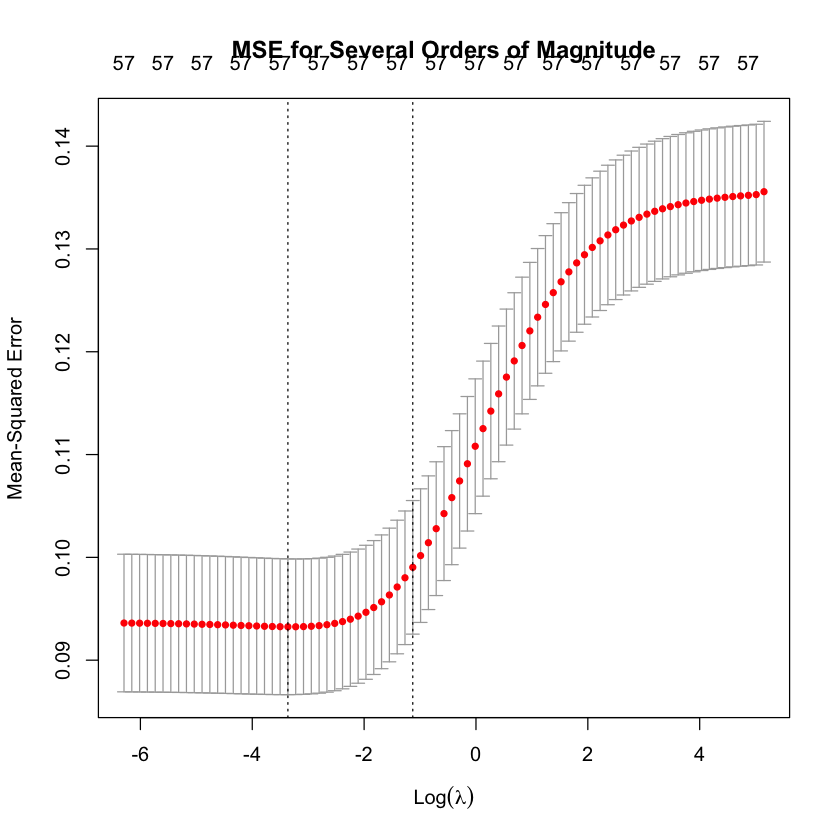

In [50]:
library(glmnet)
set.seed(1)
y <- as.numeric(as.character(y))
ridge.mod <- glmnet(x[train, ], y[train], alpha = 0, thresh = 1e-12)
#plot(ridge.mod)

cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0, lambda.min.ratio=0.000001)
# Plot the test MSE as a function of the log of the regularization 
# parameter (i.e. log($\lambda$)) for several orders of magnitude
# with error plotted
plot(cv.out, main="MSE for Several Orders of Magnitude")
# from the plot, the error remains constant around 10, so i will choose 10 for lambda
#cv.glmnet(x_train,y_train,alpha=0, lambda.min.ratio=0.000001)
bestlam <- cv.out$lambda.min
bestlam 

# best lambda is 10, can also evaluate plot to find best lambda
# bestlam=10

ridge.pred <- predict(ridge.mod, s = bestlam,
    newx = x[test, ])

# MSE
ridge_mse <- mean((ridge.pred - y.test)^2)
# RMSE
ridge_rmse <- sqrt(ridge_mse)

out <- glmnet(x, y, alpha = 0, lambda = bestlam) # Fit ridge regression model on full dataset
predict(out, type = "coefficients", s = bestlam)[1:16,] # Display coefficients using lambda chosen by CV
# coef
coef(out)

# report test error
print("Report Test Error:")
cat("Ridge MSE:", ridge_mse, "\n")
cat("Ridge RMSE:", ridge_rmse, "\n")
print("The test error is greater with Ridge Regression compared to linear regression.")

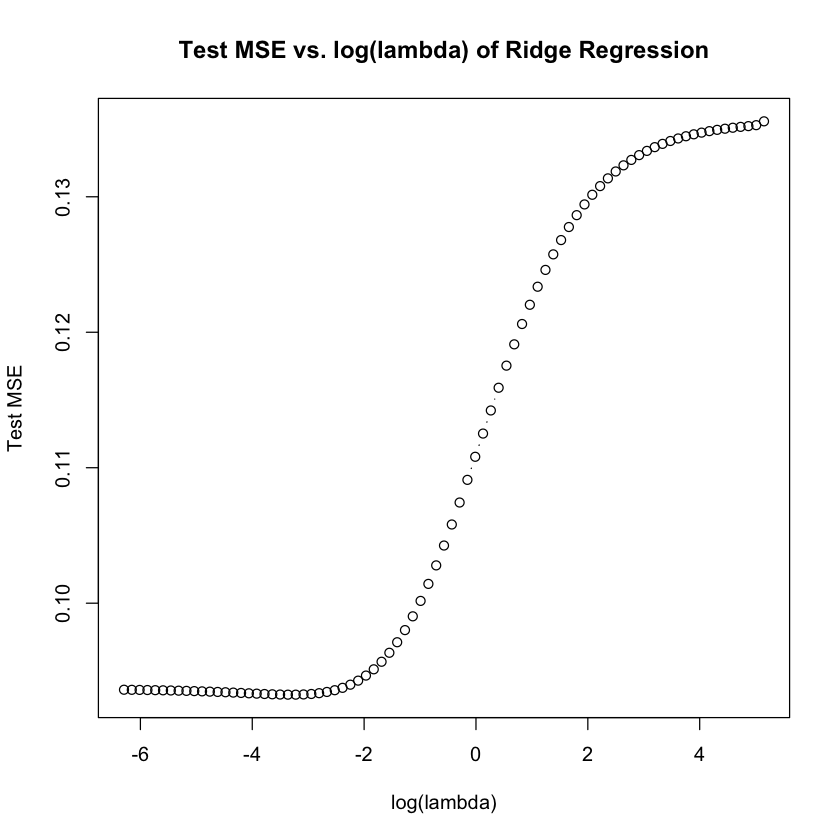

In [51]:
# Call lambda values and corresponding test MSEs
lambda_values <- cv.out$lambda
test_mses <- cv.out$cvm

# Plot the test MSE as a function of the log of the regularization 
# parameter (i.e. log($\lambda$)) for several orders of magnitude.

plot(log(lambda_values), test_mses, type = "b", 
     xlab = "log(lambda)", ylab = "Test MSE",
     main = "Test MSE vs. log(lambda) of Ridge Regression")


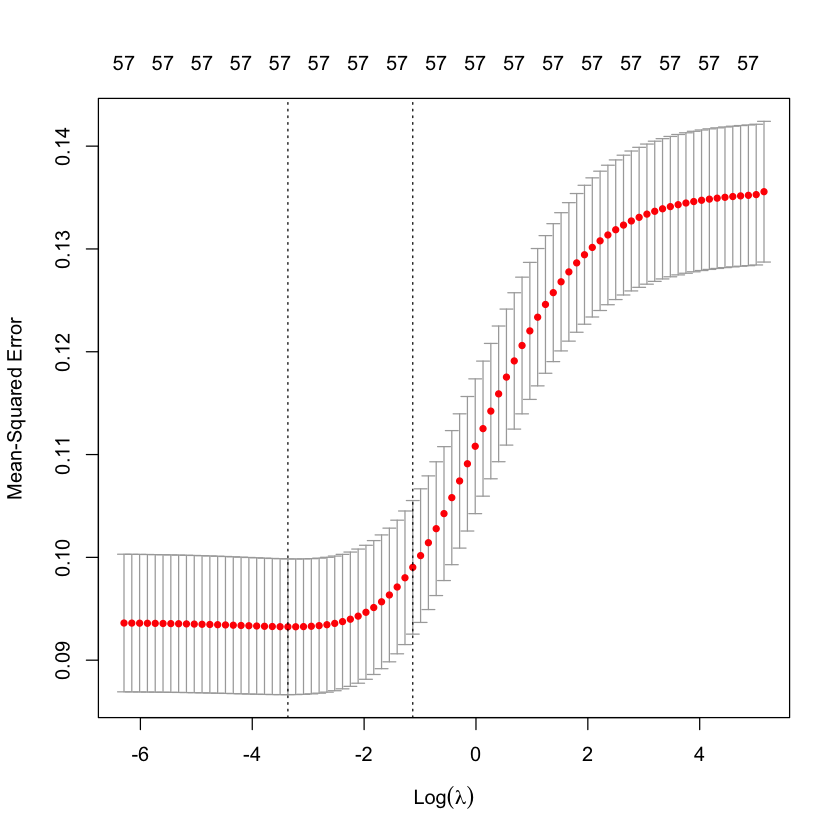

Warning message in Ops.factor(lasso.pred, y.test):
"'-' not meaningful for factors"


64 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  8.553351e-01
(Intercept)  .           
D1A_4        .           
A11Y         .           
N1_6TAKA     .           
N1_12        .           
N1_13        .           
N1_14        1.095699e-05
N1_16        .           
N1_17        .           
D1A_10AF_3M  .           
D1A_10AL_3M  1.150681e-06
D1A_8F      -4.232516e-06
A12_1       -1.684657e-02
A12_NA       .           
A13_1        .           
A13_2        .           
A13_3        .           
A13_4        .           
A13_5        .           
A13_6        .           
A13_7        .           
A13_8       -1.772948e-02
A13_9        .           
A13_NA       .           
A14_1        .           
A14_2        .           
A14_3        .           
A14_4        .           
A14_5        .           
A14_6        .           
A14_7        .           
A14_8        .           
A14_9        .           
A14_10       .           
A14_11       .        

[1] "Report Test Error:"
Lasso MSE: NA 
[1] "The test error for Lasso Regression is less than Ridge Regression compared."
[1] "Lasso Regression had a similar test error to linear regression."


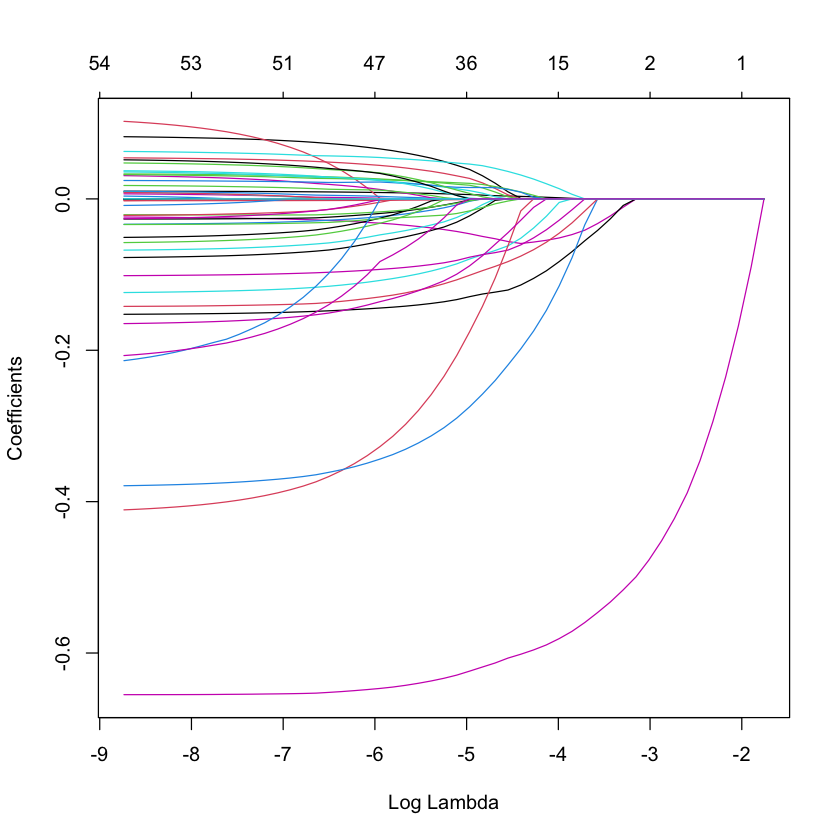

In [52]:
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1, lambda.min.ratio=0.000001)

# plot of non-zero coefficient estimates, baseline model

#plot(lasso.mod) \### set.seed(1) cv.out \<- cv.glmnet(x\[train, \], y\[train\], alpha = 1, lambda.min.ratio=0.000001)

# Plot the MSE as a function of the log of the

# regularization parameter (i.e. log($\lambda$)) for

# several orders of magnitude.

plot(cv.out)

# find lambda that minimizes training MSE

bestlam <- cv.out$lambda.min

# Another option is to base off the plot. let's set to 7

# bestlam \<- 7

# predict the test data with the best lambda

lasso.pred <- predict(lasso.mod, s = bestlam, newx = x[test, ])

# plot of non-zero coefficient estimates

plot(lasso.mod, xvar="lambda")

# Calculate the test MSE

lasso_mse <- mean((lasso.pred - y.test)^2) # Calculate the test RMSE lasso_rmse \<- sqrt(mse)

lasso.mod.final <- glmnet(x[train, ], y[train], alpha = 1, lambda=bestlam)

# sparse matrix

coef(lasso.mod.final)

# report test error

print("Report Test Error:") 
cat("Lasso MSE:", lasso_mse, "\n") 
#cat("lasso RMSE:", lasso_rmse, "\n") 
print("The test error for Lasso Regression is less than Ridge Regression compared.") 
print("Lasso Regression had a similar test error to linear regression.")

# plot of non-zero coefficient estimates

#plot(lasso.mod)

#https://www.geeksforgeeks.org/random-forest-approach-in-r-programming/

Warning message in randomForest.default(x[train, ], y[train], ntree = 500):
"The response has five or fewer unique values.  Are you sure you want to do regression?"



Call:
 randomForest(x = x[train, ], y = y[train], ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 21

          Mean of squared residuals: 0.05175567
                    % Var explained: 61.77


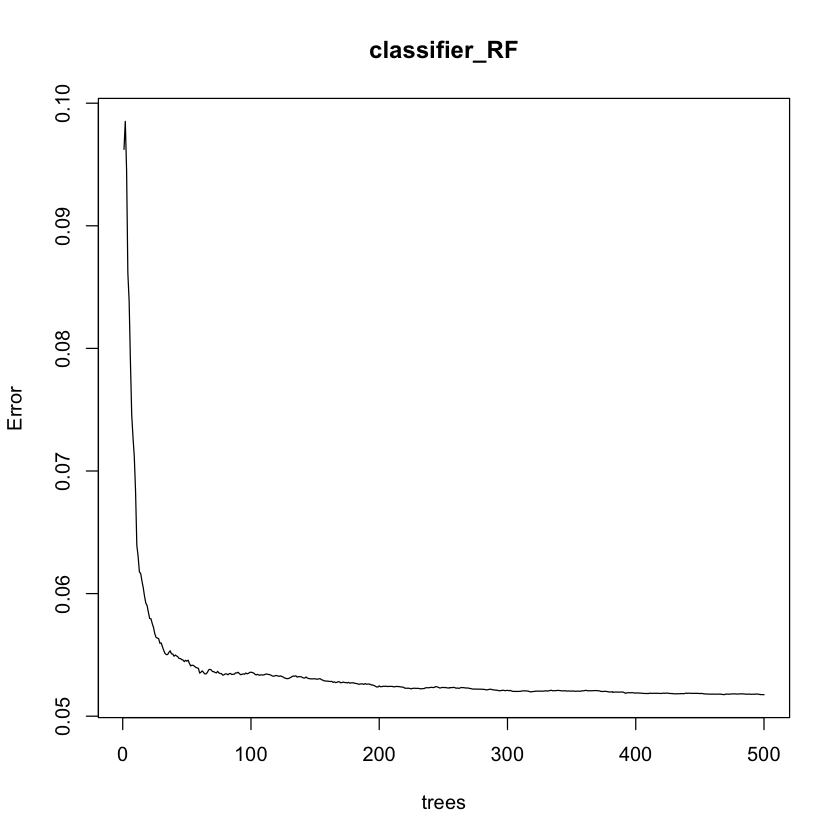

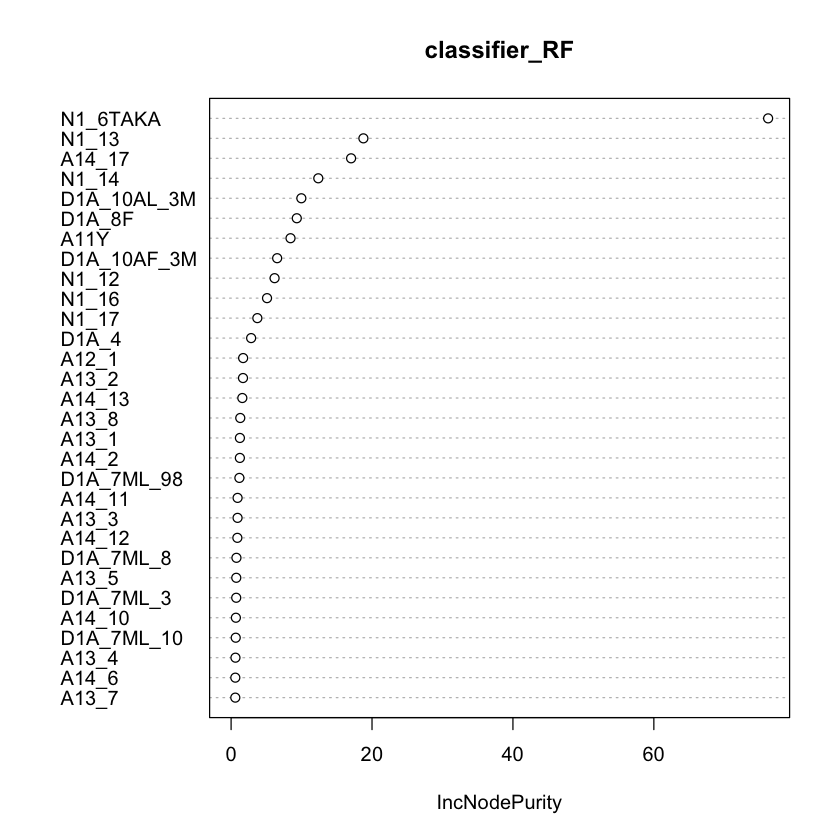

In [53]:
library(randomForest)


# Fitting Random Forest to the train dataset
set.seed(120)  # Setting seed
classifier_RF <- randomForest(x[train, ], y[train],
                               ntree = 500)

# Printing the Random Forest model
print(classifier_RF)

# Predicting the Test set results
y_pred <- predict(classifier_RF, newdata = x[test, ])


# Confusion Matrix
#confusion_mtx <- table(y[test], y_pred)
#print(confusion_mtx)

# Plotting the model
plot(classifier_RF)

# Importance plot
#importance(classifier_RF)

# Variable importance plot
varImpPlot(classifier_RF)

# Function 

In [54]:
# Load necessary libraries
library(caret)
library(pROC)
library(glmnet)
library(rpart)
library(ranger)  
library(e1071)  
library(class) 


evaluate_model <- function(model, actual, predicted_prob, threshold = 0.5, plot_roc = TRUE, show_summary = FALSE) {
  predicted_classes <- ifelse(predicted_prob > threshold, 1, 0)
  confusion <- confusionMatrix(as.factor(predicted_classes), as.factor(actual), positive = "1")


  roc_result <- roc(actual, predicted_prob)
  auc_value <- auc(roc_result)


  if (plot_roc) {
    plot(roc_result, main = "ROC Curve")
    abline(a = 0, b = 1, col = "red")  # Adding a reference line
    text(x = 0.8, y = 0.2, labels = paste("AUC =", round(auc_value, 2)))
  }
  
  # Optionally print model summary
  if (show_summary && !is.null(model)) {
    print(summary(model))
  }
  

  list(
    Accuracy = confusion$overall['Accuracy'],
    Precision = confusion$byClass['Precision'],
    Recall = confusion$byClass['Sensitivity'], 
    Specificity = confusion$byClass['Specificity'],
    AUC = auc_value,
    ROC = roc_result
  )
}

set.seed(123) # for reproducibility
train_idx <- createDataPartition(df3$D1A_1V9L, p = 0.8, list = FALSE)
train_set <- df3[train_idx, ]
test_set <- df3[-train_idx, ]


# Logistric Regression (Baseline)

In [55]:
# Assuming D1A_1V9L is the response variable
y <- df3$D1A_1V9L

# split data
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(df3), replace=TRUE, prob=c(0.8,0.2))
test <- (!train)  # Instead of (-train), use !train to negate the logical vector
y.train <- y[train]
y.test <- y[test]

# Perform logistic regression
model <- glm(D1A_1V9L ~ ., data = df3[train, ], family = binomial)

# Predict on test data
predictions <- predict(model, newdata = df3[test, ], type = "response")


Warning message:
"glm.fit: algorithm did not converge"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


# Decision Tree 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



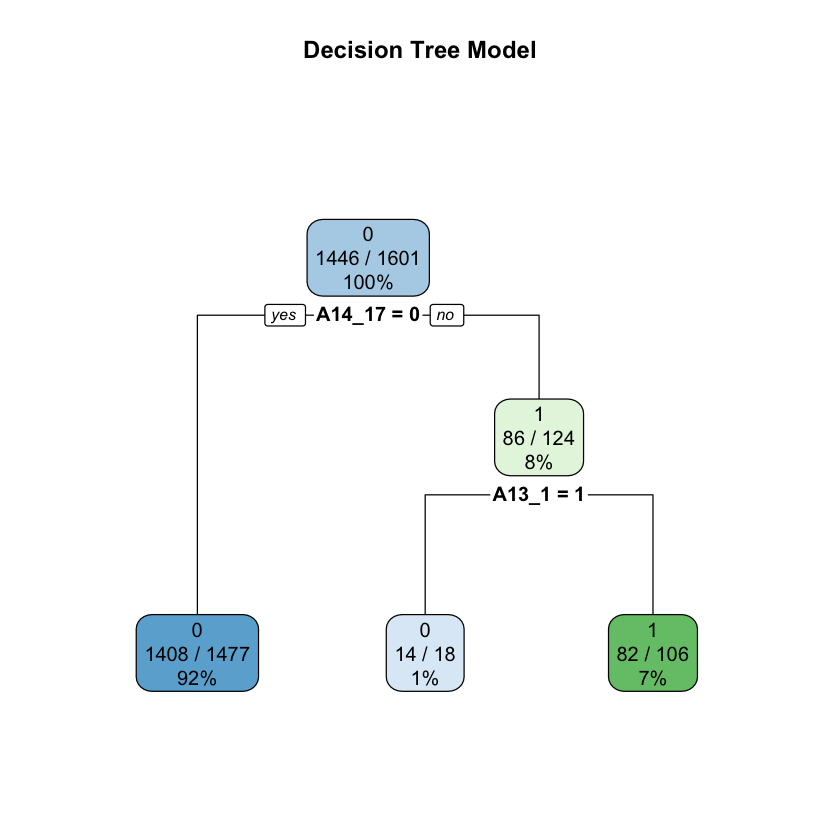

Call:
rpart(formula = D1A_1V9L ~ ., data = train_set, method = "class")
  n= 1601 

          CP nsplit rel error    xerror       xstd
1 0.30967742      0 1.0000000 1.0000000 0.07633481
2 0.06451613      1 0.6903226 0.6903226 0.06446735
3 0.01000000      2 0.6258065 0.6258065 0.06158606

Variable importance
  A14_17    A13_1  A15V4_4 A15V4_NA 
      90        9        1        1 

Node number 1: 1601 observations,    complexity param=0.3096774
  predicted class=0  expected loss=0.09681449  P(node) =1
    class counts:  1446   155
   probabilities: 0.903 0.097 
  left son=2 (1477 obs) right son=3 (124 obs)
  Primary splits:
      A14_17 < 0.5 to the left,  improve=95.724680, (0 missing)
      A14_2  < 0.5 to the right, improve= 3.013556, (0 missing)
      A14_11 < 0.5 to the right, improve= 2.540138, (0 missing)
      A13_8  < 0.5 to the right, improve= 2.446477, (0 missing)
      A13_3  < 0.5 to the left,  improve= 2.321064, (0 missing)
  Surrogate splits:
      A15V4_4  < 0.5 to the l

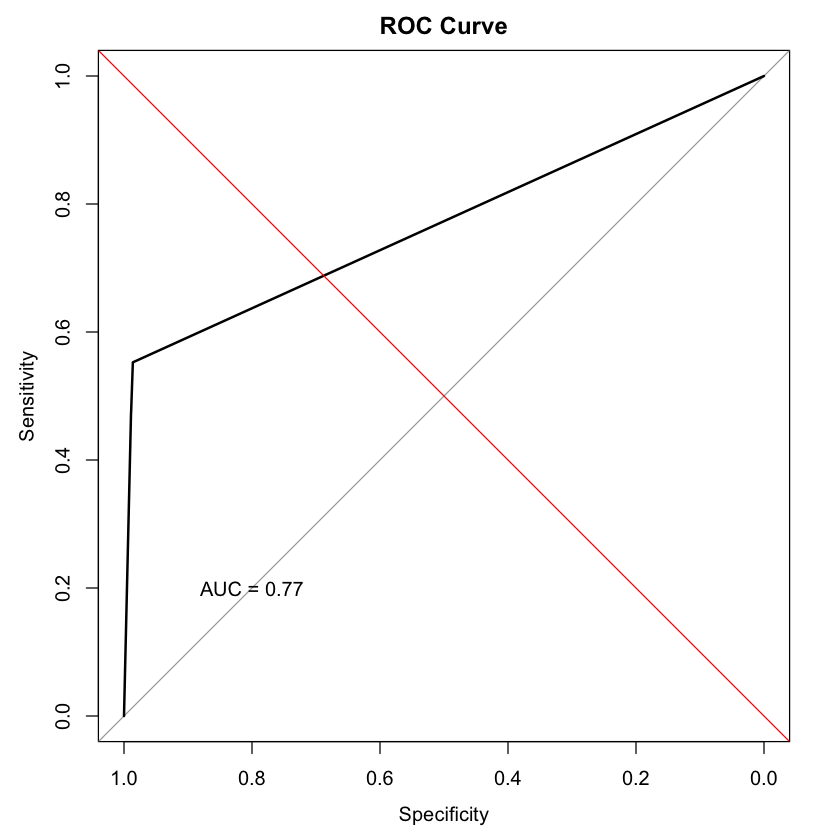

In [56]:

tree_model <- rpart(D1A_1V9L ~ ., data = train_set, method = "class")
library(rpart.plot)

rpart.plot(tree_model, main="Decision Tree Model", extra=102)  # extra=102 to show node numbers and splits
predictions_prob <- predict(tree_model, newdata = test_set, type = "prob")
results <- evaluate_model(tree_model, test_set$D1A_1V9L, predictions_prob[,2], plot_roc = TRUE, show_summary = TRUE)

print(results)


# Decision Tree (Hyperparameter Tuned)

In [57]:
library(rpart)
control <- rpart.control(minsplit = 20, minbucket = 7, maxdepth=30)
fit <- rpart(D1A_1V9L ~ ., data=train_set, method="class", control=control)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



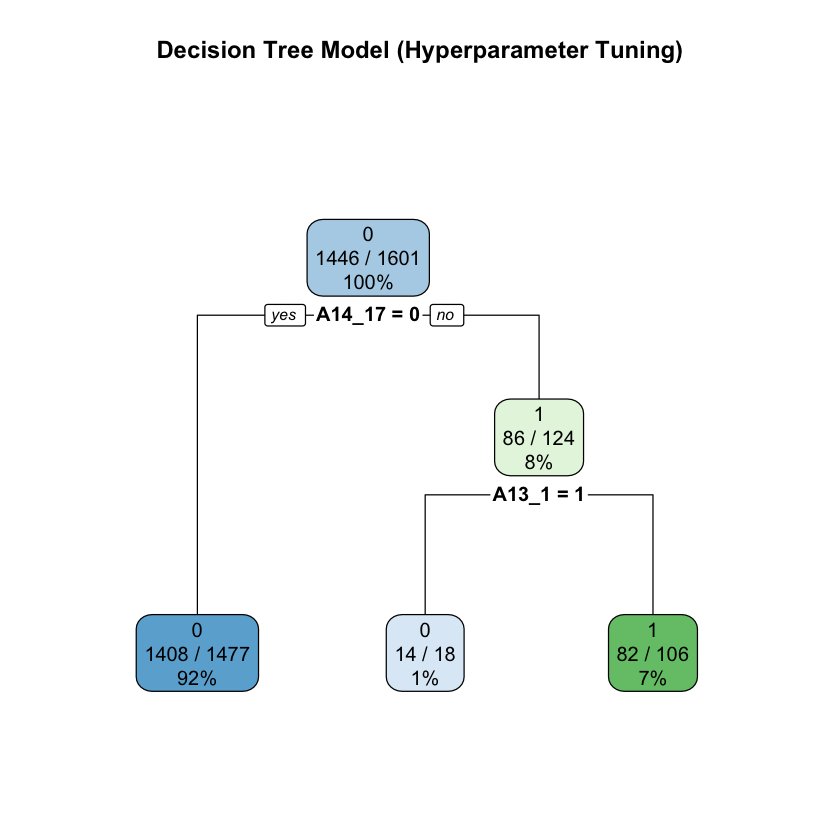

Call:
rpart(formula = D1A_1V9L ~ ., data = train_set, method = "class", 
    control = control)
  n= 1601 

          CP nsplit rel error    xerror       xstd
1 0.30967742      0 1.0000000 1.0000000 0.07633481
2 0.06451613      1 0.6903226 0.6903226 0.06446735
3 0.01000000      2 0.6258065 0.6258065 0.06158606

Variable importance
  A14_17    A13_1  A15V4_4 A15V4_NA 
      90        9        1        1 

Node number 1: 1601 observations,    complexity param=0.3096774
  predicted class=0  expected loss=0.09681449  P(node) =1
    class counts:  1446   155
   probabilities: 0.903 0.097 
  left son=2 (1477 obs) right son=3 (124 obs)
  Primary splits:
      A14_17 < 0.5 to the left,  improve=95.724680, (0 missing)
      A14_2  < 0.5 to the right, improve= 3.013556, (0 missing)
      A14_11 < 0.5 to the right, improve= 2.540138, (0 missing)
      A13_8  < 0.5 to the right, improve= 2.446477, (0 missing)
      A13_3  < 0.5 to the left,  improve= 2.321064, (0 missing)
  Surrogate splits:
     

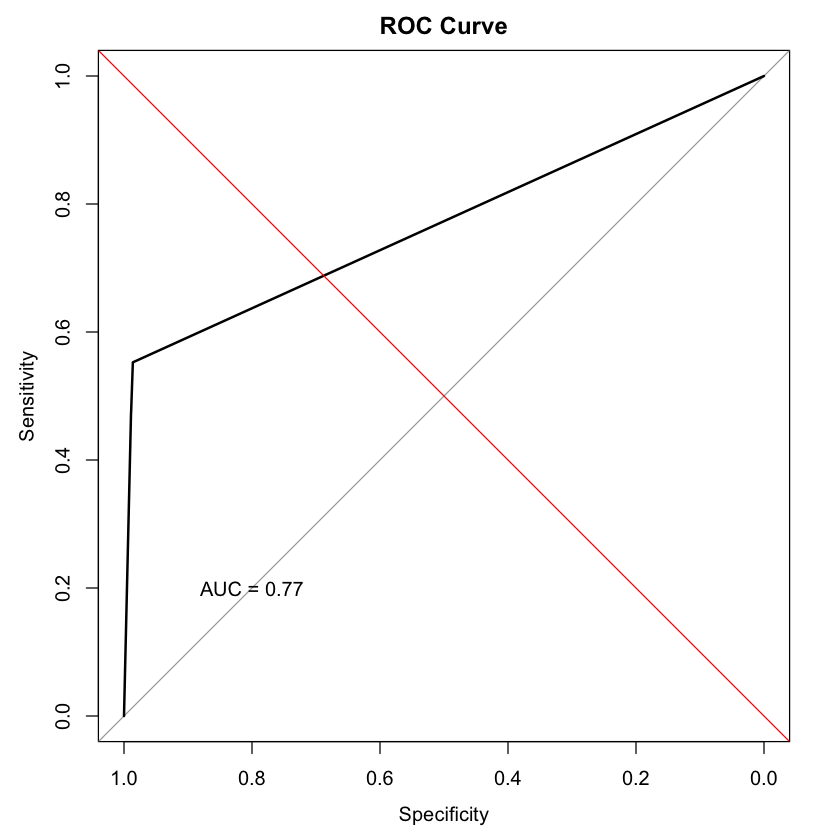

In [58]:
rpart.plot(fit, main="Decision Tree Model (Hyperparameter Tuning)", extra=102)  # extra=102 to show node numbers and splits
predictions_prob_rf <- predict(fit, newdata = test_set, type = "prob")
results <- evaluate_model(fit, test_set$D1A_1V9L, predictions_prob_rf[,2], plot_roc = TRUE, show_summary = TRUE)


# Random Forest


Call:
 randomForest(formula = D1A_1V9L ~ ., data = train_set, mtry = 5,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 6.06%
Confusion matrix:
     0  1 class.error
0 1423 23  0.01590595
1   74 81  0.47741935


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Call:
rpart(formula = D1A_1V9L ~ ., data = train_set, method = "class")
  n= 1601 

          CP nsplit rel error    xerror       xstd
1 0.30967742      0 1.0000000 1.0000000 0.07633481
2 0.06451613      1 0.6903226 0.6903226 0.06446735
3 0.01000000      2 0.6258065 0.6258065 0.06158606

Variable importance
  A14_17    A13_1  A15V4_4 A15V4_NA 
      90        9        1        1 

Node number 1: 1601 observations,    complexity param=0.3096774
  predicted class=0  expected loss=0.09681449  P(node) =1
    class counts:  1446   155
   probabilities: 0.903 0.097 
  left son=2 (1477 obs) right son=3 (124 obs)
  Primary splits:
      A14_17 < 0.5 to the left,  improve=95.724680, (0 missing)
      A14_2  < 0.5 to the right, improve= 3.013556, (0 missing)
      A14_11 < 0.5 to the right, improve= 2.540138, (0 missing)
      A13_8  < 0.5 to the right, improve= 2.446477, (0 missing)
      A13_3  < 0.5 to the left,  improve= 2.321064, (0 missing)
  Surrogate splits:
      A15V4_4  < 0.5 to the l

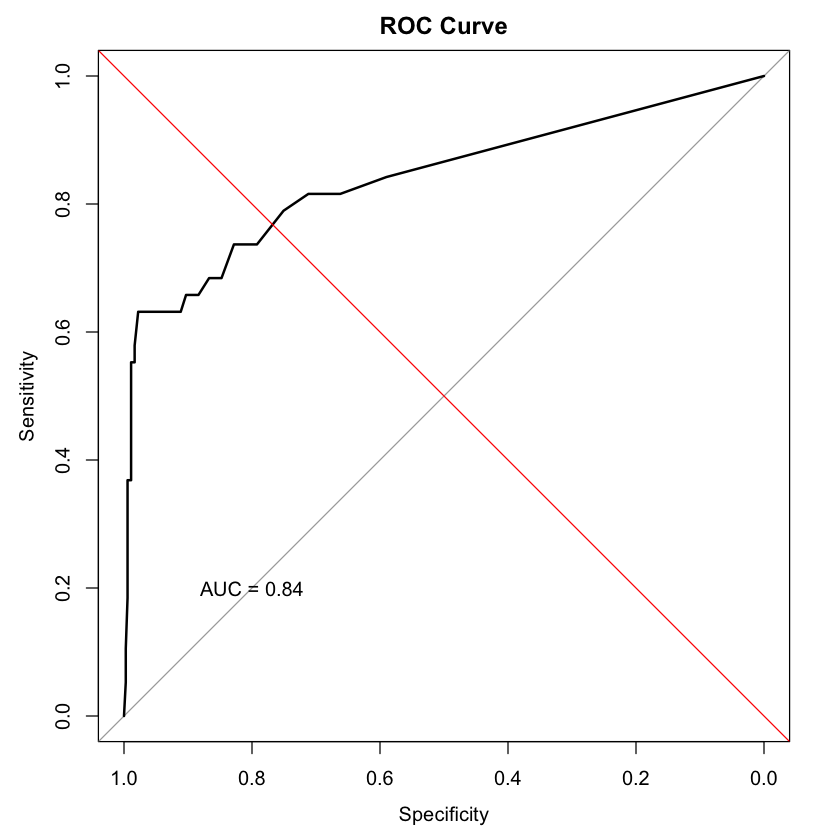

In [59]:
library(randomForest)
library(datasets)
library(caret)

rf <- randomForest(D1A_1V9L~., data=train_set, mtry=5, proximity=TRUE)
print(rf)

rf_predict= predict(rf, newdata=test_set, type='prob')
results_rf <- evaluate_model(tree_model, test_set$D1A_1V9L, rf_predict[,2], plot_roc = TRUE, show_summary = TRUE)


In [60]:
# Define the confusion matrix components
TN <- 1423
FN <- 77
FP <- 23
TP <- 78

# Calculations
accuracy <- (TP + TN) / (TP + TN + FP + FN)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)  # Recall is the same as sensitivity
specificity <- TN / (TN + FP)

# Output the results
cat(sprintf("Accuracy: %f\n", accuracy))
cat(sprintf("Precision: %f\n", precision))
cat(sprintf("Recall (Sensitivity): %f\n", recall))
cat(sprintf("Specificity: %f\n", specificity))

library(pROC)
roc_result <- roc(response = c(rep(0, TN + FP), rep(1, TP + FN)), predictor = c(rep(0, TN), rep(1, FP), rep(1, TP), rep(0, FN)))
auc_value <- auc(roc_result)
cat(sprintf("AUC: %f\n", auc_value))



Accuracy: 0.937539
Precision: 0.772277
Recall (Sensitivity): 0.503226
Specificity: 0.984094


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.743660


In [61]:
# with mtry
TN <- 1423
FP <- 23
FN <- 74
TP <- 81

# Calculate metrics
accuracy <- (TP + TN) / (TP + TN + FP + FN)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)  # Also known as sensitivity
specificity <- TN / (TN + FP)

# Print the results
cat(sprintf("Accuracy: %f\n", accuracy))
cat(sprintf("Precision: %f\n", precision))
cat(sprintf("Recall (Sensitivity): %f\n", recall))
cat(sprintf("Specificity: %f\n", specificity))


Accuracy: 0.939413
Precision: 0.778846
Recall (Sensitivity): 0.522581
Specificity: 0.984094


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.984094


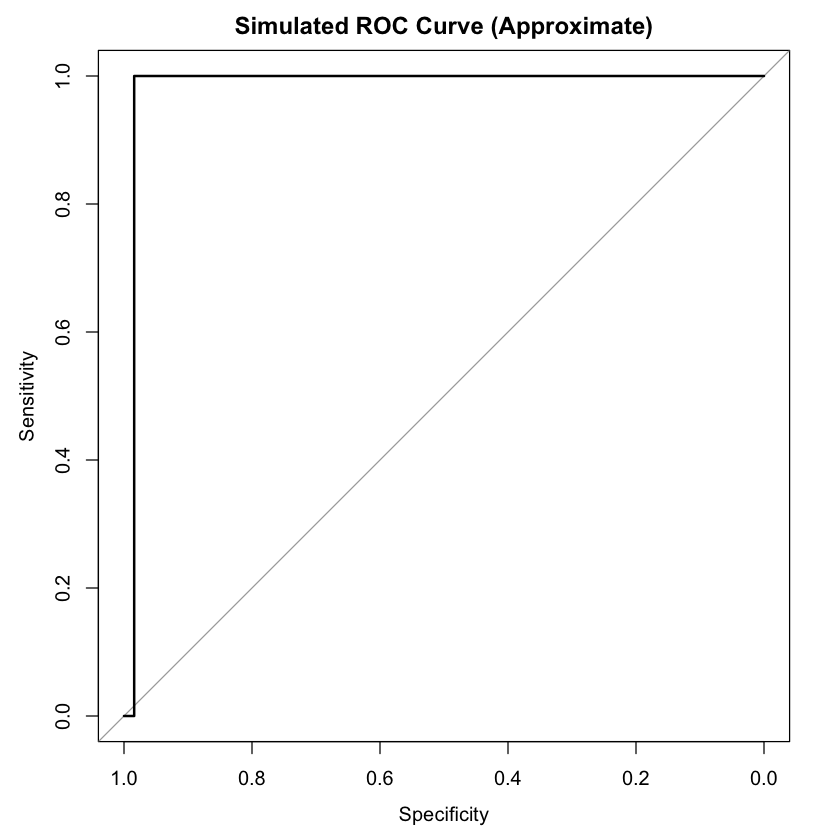

In [62]:
# Simulate predicted probabilities (Not accurate - for conceptual demonstration only)
# Assuming that TP and FN give us a threshold applied at about the median point of the positive class probabilities
simulated_probs <- c(rep(0, TN), rep(1, FP), runif(FN, 0.45, 0.55), runif(TP, 0.45, 0.55))

# Actual labels corresponding to the simulated probabilities
actual_labels <- c(rep(0, TN + FP), rep(1, TP + FN))

# Calculate ROC and AUC
roc_result <- roc(response = actual_labels, predictor = simulated_probs)
auc_value <- auc(roc_result)
plot(roc_result, main = "Simulated ROC Curve (Approximate)")

# Print AUC
cat(sprintf("AUC: %f\n", auc_value))


# Random Forest (Hyperparameter Tuned)

In [63]:
# # Random Search
# control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
# set.seed(123)
# mtry <- sqrt(ncol(train_set))
# rf_random <- train(D1A_1V9L~., data=train_set, method="rf", tuneLength=15, trControl=control)
# print(rf_random)
# plot(rf_random)


Call:
 randomForest(formula = D1A_1V9L ~ ., data = train_set, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 6.18%
Confusion matrix:
     0  1 class.error
0 1423 23  0.01590595
1   76 79  0.49032258


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Call:
rpart(formula = D1A_1V9L ~ ., data = train_set, method = "class")
  n= 1601 

          CP nsplit rel error    xerror       xstd
1 0.30967742      0 1.0000000 1.0000000 0.07633481
2 0.06451613      1 0.6903226 0.6903226 0.06446735
3 0.01000000      2 0.6258065 0.6258065 0.06158606

Variable importance
  A14_17    A13_1  A15V4_4 A15V4_NA 
      90        9        1        1 

Node number 1: 1601 observations,    complexity param=0.3096774
  predicted class=0  expected loss=0.09681449  P(node) =1
    class counts:  1446   155
   probabilities: 0.903 0.097 
  left son=2 (1477 obs) right son=3 (124 obs)
  Primary splits:
      A14_17 < 0.5 to the left,  improve=95.724680, (0 missing)
      A14_2  < 0.5 to the right, improve= 3.013556, (0 missing)
      A14_11 < 0.5 to the right, improve= 2.540138, (0 missing)
      A13_8  < 0.5 to the right, improve= 2.446477, (0 missing)
      A13_3  < 0.5 to the left,  improve= 2.321064, (0 missing)
  Surrogate splits:
      A15V4_4  < 0.5 to the l

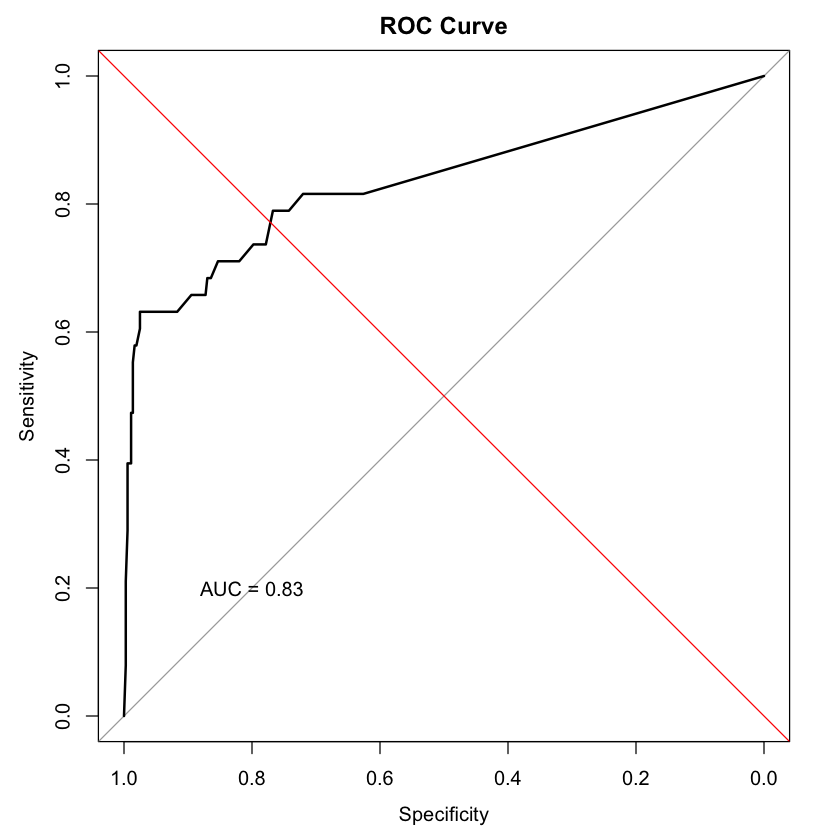

In [64]:
rf <- randomForest(D1A_1V9L~., data=train_set, proximity=TRUE)
print(rf)

rf_predict= predict(rf, newdata=test_set, type='prob')
results_rf <- evaluate_model(tree_model, test_set$D1A_1V9L, rf_predict[,2], plot_roc = TRUE, show_summary = TRUE)

In [65]:
# Define the confusion matrix components
TN <- 1423
FP <- 23
FN <- 74
TP <- 81

# Calculate metrics
accuracy <- (TP + TN) / (TP + TN + FP + FN)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)  # Also known as sensitivity
specificity <- TN / (TN + FP)

# Print the results
cat(sprintf("Accuracy: %f\n", accuracy))
cat(sprintf("Precision: %f\n", precision))
cat(sprintf("Recall (Sensitivity): %f\n", recall))
cat(sprintf("Specificity: %f\n", specificity))


Accuracy: 0.939413
Precision: 0.778846
Recall (Sensitivity): 0.522581
Specificity: 0.984094


In [66]:
# Load necessary library
if (!require("pROC")) install.packages("pROC")
library(pROC)

# Assuming `pred_probs` is the vector of probabilities that each test instance belongs to class 1
roc_result <- roc(response = as.numeric(c(rep(0, TN + FP), rep(1, TP + FN))), predictor = pred_probs)
auc_value <- auc(roc_result)
plot(roc_result, main = "ROC Curve")

# Print AUC
cat(sprintf("AUC: %f\n", auc_value))


ERROR: Error in eval(expr, envir, enclos): object 'pred_probs' not found


In [ ]:
print(rf_random)

Random Forest 

1601 samples
  51 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1441, 1441, 1441, 1441, 1441, 1441, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.9161057  0.2626998
   5    0.9387818  0.5859005
  14    0.9335695  0.5484188
  25    0.9285746  0.5213768
  26    0.9285746  0.5213768
  27    0.9287830  0.5221901
  28    0.9285746  0.5213768
  37    0.9271202  0.5089822
  42    0.9264952  0.5062161
  43    0.9258689  0.5000417
  50    0.9254535  0.4973940
  51    0.9256618  0.4959918

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Call:
rpart(formula = D1A_1V9L ~ ., data = train_set, method = "class")
  n= 1601 

          CP nsplit rel error    xerror       xstd
1 0.30967742      0 1.0000000 1.0000000 0.07633481
2 0.06451613      1 0.6903226 0.6903226 0.06446735
3 0.01000000      2 0.6258065 0.6258065 0.06158606

Variable importance
  A14_17    A13_1  A15V4_4 A15V4_NA 
      90        9        1        1 

Node number 1: 1601 observations,    complexity param=0.3096774
  predicted class=0  expected loss=0.09681449  P(node) =1
    class counts:  1446   155
   probabilities: 0.903 0.097 
  left son=2 (1477 obs) right son=3 (124 obs)
  Primary splits:
      A14_17 < 0.5 to the left,  improve=95.724680, (0 missing)
      A14_2  < 0.5 to the right, improve= 3.013556, (0 missing)
      A14_11 < 0.5 to the right, improve= 2.540138, (0 missing)
      A13_8  < 0.5 to the right, improve= 2.446477, (0 missing)
      A13_3  < 0.5 to the left,  improve= 2.321064, (0 missing)
  Surrogate splits:
      A15V4_4  < 0.5 to the l

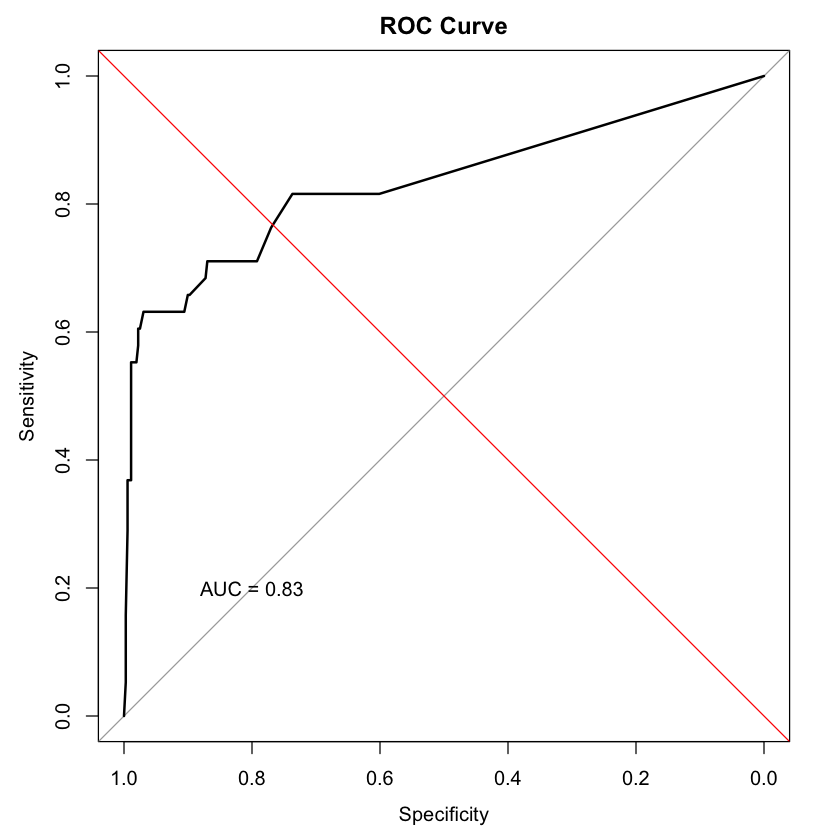

In [ ]:
rf_predict= predict(rf_random, newdata = test_set, type = "prob") 
results <- evaluate_model(tree_model, test_set$D1A_1V9L, rf_predict[,2], plot_roc = TRUE, show_summary = TRUE)


# XG Boost

In [ ]:
library(xgboost)
library(caTools)
library(dplyr)
library(caret)


set.seed(42)
sample_split <- sample.split(Y = df1$D1A_1V1L, SplitRatio = 0.7)
train_set <- subset(x = df1, sample_split == TRUE)
test_set <- subset(x = df1, sample_split == FALSE)

y_train <- as.integer(train_set$D1A_1V1L) - 1
y_test <- as.integer(test_set$D1A_1V1L) - 1
X_train <- train_set %>% select(-D1A_1V1L)
X_test <- test_set %>% select(-D1A_1V1L)

xgb_train <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
xgb_test <- xgb.DMatrix(data = as.matrix(X_test), label = y_test)
xgb_params <- list(
  booster = "gbtree",
  eta = 0.01,
  max_depth = 8,
  gamma = 4,
  subsample = 0.75,
  colsample_bytree = 1,
  objective = "multi:softprob",
  eval_metric = "mlogloss",
  num_class = length(levels(df1$D1A_1V1L))
)

xgb_model <- xgb.train(
  params = xgb_params,
  data = xgb_train,
  nrounds = 5000,
  verbose = 1
)
xgb_model



Attaching package: 'dplyr'


The following object is masked from 'package:xgboost':

    slice


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




##### xgb.Booster
raw: 28.6 Mb 
call:
  xgb.train(params = xgb_params, data = xgb_train, nrounds = 5000, 
    verbose = 1)
params (as set within xgb.train):
  booster = "gbtree", eta = "0.01", max_depth = "8", gamma = "4", subsample = "0.75", colsample_bytree = "1", objective = "multi:softprob", eval_metric = "mlogloss", num_class = "2", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 62 
niter: 5000
nfeatures : 62 

In [ ]:
xgb_preds <- predict(xgb_model, as.matrix(X_test), reshape = TRUE)
xgb_preds <- as.data.frame(xgb_preds)
colnames(xgb_preds) <- levels(df1$D1A_1V1L)
xgb_preds

0,1
<dbl>,<dbl>
0.227813259,0.77218682
0.114669599,0.88533038
0.009200272,0.99079973
0.013114963,0.98688507
0.010273178,0.98972684
0.021832822,0.97816718
0.086632565,0.91336745
0.033191621,0.96680844
0.013942515,0.98605746


In [ ]:
xgb_preds$PredictedClass <- apply(xgb_preds, 1, function(y) colnames(xgb_preds)[which.max(y)])
xgb_preds$ActualClass <- levels(df1$D1A_1V1L)[y_test + 1]
xgb_preds

accuracy <- sum(xgb_preds$PredictedClass == xgb_preds$ActualClass) / nrow(xgb_preds)
accuracy

confusionMatrix(factor(xgb_preds$ActualClass), factor(xgb_preds$PredictedClass))


0,1,PredictedClass,ActualClass
<dbl>,<dbl>,<chr>,<chr>
0.227813259,0.77218682,1,0
0.114669599,0.88533038,1,0
0.009200272,0.99079973,1,1
0.013114963,0.98688507,1,1
0.010273178,0.98972684,1,1
0.021832822,0.97816718,1,1
0.086632565,0.91336745,1,1
0.033191621,0.96680844,1,1
0.013942515,0.98605746,1,1


[1] 0.9383333

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  67  28
         1   9 496
                                         
               Accuracy : 0.9383         
                 95% CI : (0.916, 0.9562)
    No Information Rate : 0.8733         
    P-Value [Acc > NIR] : 1.251e-07      
                                         
                  Kappa : 0.7482         
                                         
 Mcnemar's Test P-Value : 0.003085       
                                         
            Sensitivity : 0.8816         
            Specificity : 0.9466         
         Pos Pred Value : 0.7053         
         Neg Pred Value : 0.9822         
             Prevalence : 0.1267         
         Detection Rate : 0.1117         
   Detection Prevalence : 0.1583         
      Balanced Accuracy : 0.9141         
                                         
       'Positive' Class : 0              
                                         

In [ ]:
library(pROC)

pred_probs <- predict(xgb_model, xgb_test)
# Compute ROC curve
roc_curve <- roc(y_test, pred_probs)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

auc_value <- auc(roc_curve)
cat(sprintf("AUC: %f", auc_value))

Setting levels: control = 0, case = 1



ERROR: Error in roc.default(y_test, pred_probs): Response and predictor must be vectors of the same length.


In [ ]:
table(df3$D1A_1V9L)



   1 
2000 